In [14]:
from pydicom import dcmread
import glob, os
import cv2

In [82]:
mr_path = "Hippo_25_openDataset/09/MR.1.2.246.352.221.46420290924634077398994425830216122251.dcm"
mr = dcmread(mr_path)
mr.pixel_array.shape

/root/miniconda3/envs/tomo/lib/python3.6/site-packages/pydicom/dataset.py:516: UserWarning: Invalid value used with the 'in' operator: must be an element tag as a 2-tuple or int, or an element keyword
  warnings.warn(msg)


(256, 256)

In [15]:
rtss_path = "Hippo_25_openDataset/25/RS.1.2.246.352.221.56074210627557293505850286547230877058.dcm"

In [16]:
rtss = dcmread(rtss_path)
rtss

/root/miniconda3/envs/tomo/lib/python3.6/site-packages/pydicom/dataelem.py:778: UserWarning: Unknown DICOM tag (0008, 0123) - setting VR to 'UN'
  warnings.warn(msg)
/root/miniconda3/envs/tomo/lib/python3.6/site-packages/pydicom/dataelem.py:778: UserWarning: Unknown DICOM tag (0008, 0124) - setting VR to 'UN'
  warnings.warn(msg)
/root/miniconda3/envs/tomo/lib/python3.6/site-packages/pydicom/dataelem.py:778: UserWarning: Unknown DICOM tag (0008, 0118) - setting VR to 'UN'
  warnings.warn(msg)
/root/miniconda3/envs/tomo/lib/python3.6/site-packages/pydicom/dataelem.py:778: UserWarning: Unknown DICOM tag (0008, 0122) - setting VR to 'UN'
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Structure Set Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.221.56074210627557293505850286547230877058
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002, 0013) Implementation Version Name         SH: 'DCIE 2.2'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20220622'
(0008, 0013) Instance Creation Time              TM: '152001'
(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.221.56074210627557293505850286547230

In [5]:
mr_paths = glob.glob('Hippo_25_openDataset/01/MR*')
len(mr_paths)

276

In [ ]:
mr_paths

In [17]:
ContourImageSequence = rtss.ReferencedFrameOfReferenceSequence[0].RTReferencedStudySequence[0].RTReferencedSeriesSequence[0].ContourImageSequence

In [18]:
UIDs = []
for contour in ContourImageSequence:
    UID = contour.ReferencedSOPInstanceUID
    UIDs.append(UID)

In [19]:
UIDs

['1.2.246.352.221.46612133785441920551695315163109873067',
 '1.2.246.352.221.514303886534417513311812478718819315337',
 '1.2.246.352.221.564203426661584031017226563029739544246',
 '1.2.246.352.221.55203196754927844909121738931917821337',
 '1.2.246.352.221.510550466908838897218167673714051463324',
 '1.2.246.352.221.57268298111420031788517554892673206950',
 '1.2.246.352.221.541252869125198783913998123939193140648',
 '1.2.246.352.221.477831767875178667513208035389642776251',
 '1.2.246.352.221.560346974240385337011748815180371895684',
 '1.2.246.352.221.517868875423153469114755683552621347501',
 '1.2.246.352.221.50797659134590174191288000457165255567',
 '1.2.246.352.221.523448130857766094515471184629459269533',
 '1.2.246.352.221.47209703182603582557535478337454295681',
 '1.2.246.352.221.55792833464688903812997900225297546144',
 '1.2.246.352.221.481789315923555051312910649351375912600',
 '1.2.246.352.221.52889113136671289061667797535840679557',
 '1.2.246.352.221.51818205271987416881119482117

In [20]:
import nrrd
import numpy as np
from matplotlib import pyplot as plt

In [31]:
data = np.zeros([512, 512])

In [40]:
d = {"UID": UIDs}

In [41]:
nrrd.write('test.nrrd', data, d)

In [42]:
readdata, header = nrrd.read('test.nrrd')

In [88]:
len(contour)

96

In [89]:
contour = np.reshape(contour, [len(contour)//2, 2])
contour

array([[ 11.26, -56.98],
       [  4.52,  12.2 ],
       [-57.39,   4.52],
       [ 13.14, -57.39],
       [  4.52,  14.07],
       [-57.41,   4.52],
       [ 15.01, -57.41],
       [  4.52,  15.95],
       [-57.41,   4.52],
       [ 16.89, -57.11],
       [  4.52,  17.36],
       [-56.72,   4.52],
       [ 17.82, -56.31],
       [  4.52,  18.46],
       [-55.78,   4.52],
       [ 18.76, -55.53],
       [  4.52,  19.7 ],
       [-54.99,   4.52],
       [ 19.85, -54.84],
       [  4.52,  20.14],
       [-53.91,   4.52],
       [ 19.89, -52.97],
       [  4.52,  19.7 ],
       [-52.78,   4.52],
       [ 18.76, -52.18],
       [  4.52,  17.82],
       [-52.17,   4.52],
       [ 16.89, -52.18],
       [  4.52,  15.95],
       [-52.3 ,   4.52],
       [ 15.01, -52.35],
       [  4.52,  14.07],
       [-52.35,   4.52],
       [ 13.14, -52.59],
       [  4.52,  12.2 ],
       [-52.83,   4.52],
       [ 11.94, -52.97],
       [  4.52,  11.26],
       [-53.29,   4.52],
       [ 10.61, -53.91],


# 左邊是1，右邊是2

In [68]:
number_label_dict = {}

In [69]:
RTROIObservationsSequence = rtss.RTROIObservationsSequence
for RTROIObservations in RTROIObservationsSequence:
    number = RTROIObservations.ReferencedROINumber
    label = RTROIObservations.ROIObservationLabel
    number_label_dict[number] = label
print(number_label_dict)

{"1": 'Hippocampus_L', "2": 'Hippocampus_R'}


In [ ]:
Contour_dict = {}

In [21]:
def conv_mm2px(di_ipp, di_iop, di_ps, contour_mm: list):
    """
    It converts a list of 3D points in millimeters to a list of 2D points in pixels.
    Args:
      di_ipp: Image Position Patient
      di_iop: Image Orientation Patient
      di_ps: pixel spacing
      contour_mm (list): list of x,y,z coordinates of the contour in mm
    Returns:
      The contour_px is being returned.
    """
    # yapf: disable
    matrix_im = [ [ di_iop[ 0 ] * di_ps[ 0 ], di_iop[ 3 ] * di_ps[ 1 ], np.finfo( np.float16 ).tiny, di_ipp[ 0 ] ],
                  [ di_iop[ 1 ] * di_ps[ 0 ], di_iop[ 4 ] * di_ps[ 1 ], np.finfo( np.float16 ).tiny, di_ipp[ 1 ] ],
                  [ di_iop[ 2 ] * di_ps[ 0 ], di_iop[ 5 ] * di_ps[ 1 ], np.finfo( np.float16 ).tiny, di_ipp[ 2 ] ],
                  [ 0                       , 0                       , 0                          , 1           ] ]
    # yapf: enable
    inv_matrix_im = np.linalg.inv(np.array(matrix_im))
    mm_len = len(contour_mm)
    contour_mm_ary = np.concatenate([np.array(contour_mm).reshape(mm_len // 3, 3), np.ones((mm_len // 3, 1))], 1)
    contour_px = np.rint(np.dot(inv_matrix_im, contour_mm_ary.T).T)[:, 0:2].astype(int)

    return contour_px

/root/miniconda3/envs/tomo/lib/python3.6/site-packages/pydicom/dataset.py:516: UserWarning: Invalid value used with the 'in' operator: must be an element tag as a 2-tuple or int, or an element keyword
  warnings.warn(msg)


1
2


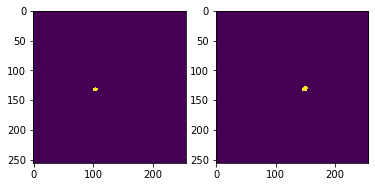

In [25]:
ROIContourSequence = rtss.ROIContourSequence
for index, Sequence in enumerate(ROIContourSequence):
    number = Sequence.ReferencedROINumber

    ContourSequence = Sequence.ContourSequence
    for seq in ContourSequence:
        mr_id = seq.ContourImageSequence[0].ReferencedSOPInstanceUID
        
        ds = dcmread(os.path.join("Hippo_25_openDataset/25", 'MR.{}.dcm'.format(mr_id)))
        mr_info = {}
        mr_info['spacing'] = ds.PixelSpacing
        mr_info['position'] = ds.ImagePositionPatient
        mr_info['orientation'] = ds.ImageOrientationPatient
        mr_info['mrarray'] = ds.pixel_array
        
        # polygon contour data
        contour_points_mm = seq.ContourData
        # mm to pixel
        contour_points_px = conv_mm2px(mr_info['position'], mr_info['orientation'], mr_info['spacing'],
                                       contour_points_mm)

        mask_img = cv2.fillConvexPoly(np.zeros(mr_info["mrarray"].shape, np.uint8), contour_points_px, number)
        print(np.max(mask_img))
        plt.subplot(1, 2, index+1)
        plt.imshow(mask_img)
        break
    

In [52]:
ROIContourSequence = rtss.ROIContourSequence
ROIContourSequence

<Sequence, length 2>

In [72]:
ROIContourSequence[0].ReferencedROINumber

"1"

In [78]:
ROIContourSequence[0]

(3006, 002a) ROI Display Color                   IS: [255, 255, 0]
(3006, 0040)  Contour Sequence  34 item(s) ---- 
   (3006, 0016)  Contour Image Sequence  1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.54188451551812964229419213337489297296
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points            IS: "32"
   (3006, 0050) Contour Data                        DS: Array of 96 elements
   ---------
   (3006, 0016)  Contour Image Sequence  1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.545879581418213684615438009166137303685
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points            IS: "36"
 

In [56]:
for Contour in ROIContourSequence:
    Sequence = Contour.ContourSequence
    for 
    print(Sequence)

[(3006, 0016)  Contour Image Sequence  1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.54188451551812964229419213337489297296
   ---------
(3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
(3006, 0046) Number of Contour Points            IS: "32"
(3006, 0050) Contour Data                        DS: Array of 96 elements(3006, 0016)  Contour Image Sequence  1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.545879581418213684615438009166137303685
   ---------
(3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
(3006, 0046) Number of Contour Points            IS: "36"
(3006, 0050) Contour Data                        DS: Array of 108 elements(3006, 0016)  Contour Image Sequence  1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID 

In [3]:
nrrd_path = "Hippo_25_openDataset/01/Hippocampus_L.nrrd"
readdata, header = nrrd.read(nrrd_path)

In [6]:
UID_path = "Hippo_25_openDataset/01/UIDs.txt"
with open(UID_path, 'r') as f:
    UIDs = [line.strip() for line in f.readlines()]
UIDs

['1.2.246.352.221.47092067585438066375412636826727812518',
 '1.2.246.352.221.47765637883483841186373980122781236385',
 '1.2.246.352.221.48824208850832949406577695833136510361',
 '1.2.246.352.221.49227789750943002548780831409235185077',
 '1.2.246.352.221.55821555946048190009590728614587287681',
 '1.2.246.352.221.468197283733467866111619444004272404109',
 '1.2.246.352.221.48371048942873614286992708797469556614',
 '1.2.246.352.221.51535336403762859679592964117144648629',
 '1.2.246.352.221.50736547145775928943093968882828073649',
 '1.2.246.352.221.545993292198238944311101656989532760740',
 '1.2.246.352.221.57466517110362881482366876719339758214',
 '1.2.246.352.221.49373045519186486208310753787401876894',
 '1.2.246.352.221.47594632744828780917368667258871904685',
 '1.2.246.352.221.534074134236874008711680454947085107854',
 '1.2.246.352.221.52361453503354837431015990675899612320',
 '1.2.246.352.221.5677815325990322143476153781975247284',
 '1.2.246.352.221.542007467926252068915747336169147051

In [7]:
len(UIDs)

276

In [5]:
import torch
import nrrd
from matplotlib import pyplot as plt
import numpy as np

In [22]:
L, header = nrrd.read('Hippo_25_openDataset/03/Hippocampus_L.nrrd')
for idx, img in enumerate(L.transpose(2, 0, 1)):
    if img.max() > 0:
        print(idx)

184
185
186
187
188
189
190
191
192
193
194


In [23]:
R, header = nrrd.read('Hippo_25_openDataset/03/Hippocampus_R.nrrd')
for idx, img in enumerate(R.transpose(2, 0, 1)):
    if img.max() > 0:
        print(idx)

193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


In [28]:
output = np.array([L[:, :, 193], R[:, :, 193]])
output = np.expand_dims(output, 0)
output.shape, output.max()

((1, 2, 256, 256), 1.0)

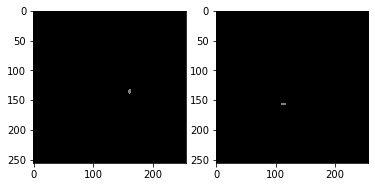

In [29]:
output = output * 0.5
for idx, img in enumerate(output[0]):
    plt.subplot(1, 2, idx+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)

(1, 2, 256, 256)


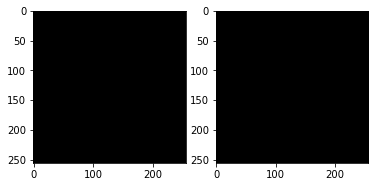

In [35]:
Output = np.round(output)
print(Output.shape)
for idx, img in enumerate(Output[0]):
    plt.subplot(1, 2, idx+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)


In [11]:
path = 'Output/HIP_002/prediction.nrrd'
data, header = nrrd.read(path)
data.shape

(256, 256, 176)

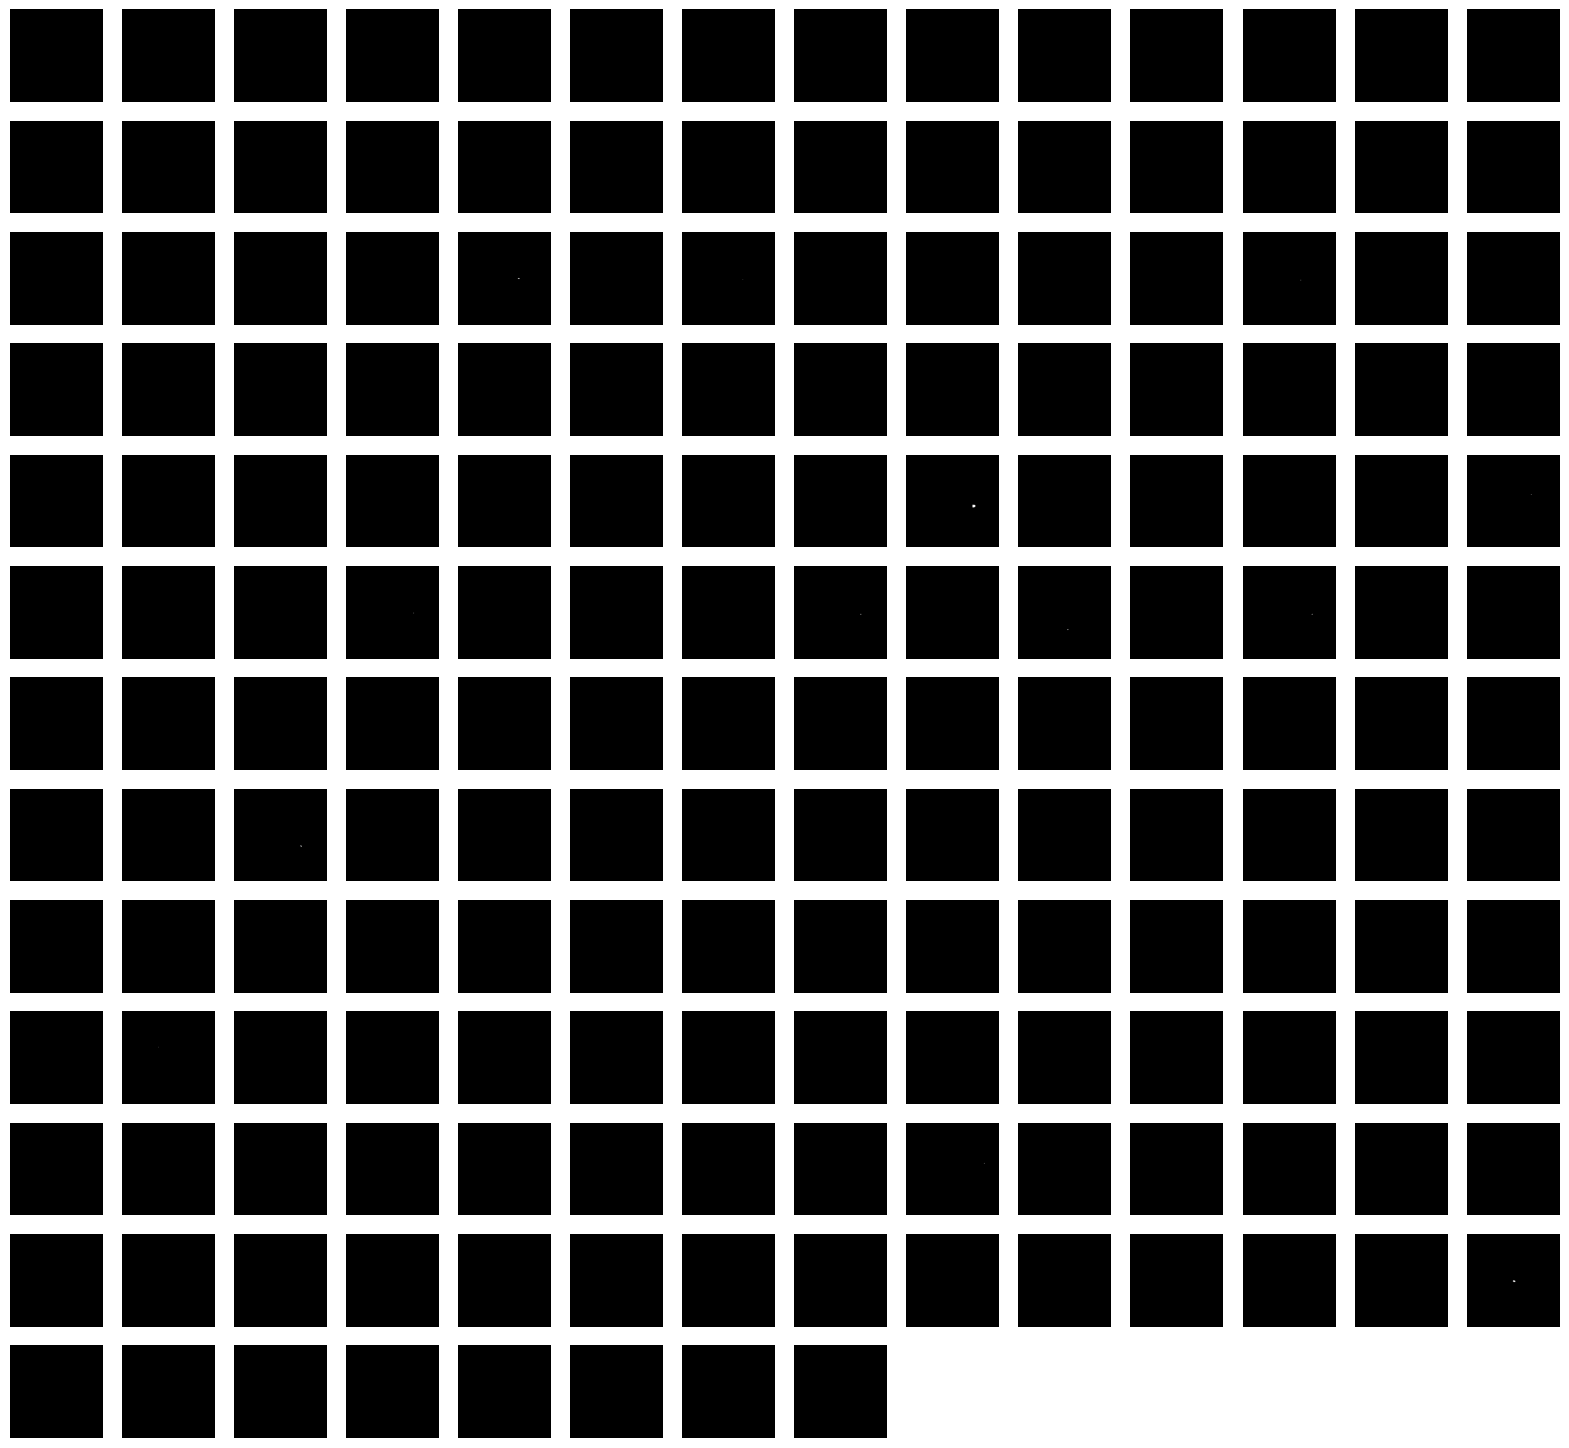

In [13]:
plt.figure(figsize=(20, 20))
for idx, img in enumerate(data.transpose(2, 0, 1)):
    plt.subplot(14, 14, idx+1)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [17]:
import os
from pydicom import dcmread
import numpy as np
def open_txt(path):
    with open(path, 'r') as f:
        lst = [line.strip() for line in f.readlines()]
    return lst

MaskList_path = "data/opendataset/01.txt"
lst = open_txt(MaskList_path)
folder = "Hippo_25_openDataset"
output = []
for idx, mr_path in enumerate(lst):
    patient_id, mr_id = mr_path.split('/')
    
    # get MR image
    mr_path = os.path.join(folder, patient_id, "MR.{}.dcm".format(mr_id))
    ds = dcmread(mr_path)
    output.append(ds.pixel_array)

output = np.array(output).transpose(1, 2, 0)
nrrd.write(os.path.join("Output/01/", 'image.nrrd'), output)
output.shape
    


(256, 256, 276)

In [7]:
import nrrd
from pydicom import dcmread
from matplotlib import pyplot as plt
import numpy as np

In [8]:
seg_path = "Hippo_dataset_VGHTC_share/HIP_002/Segmentation_3.seg.nrrd"
data, header = nrrd.read(seg_path)
data.shape

(256, 256, 176)

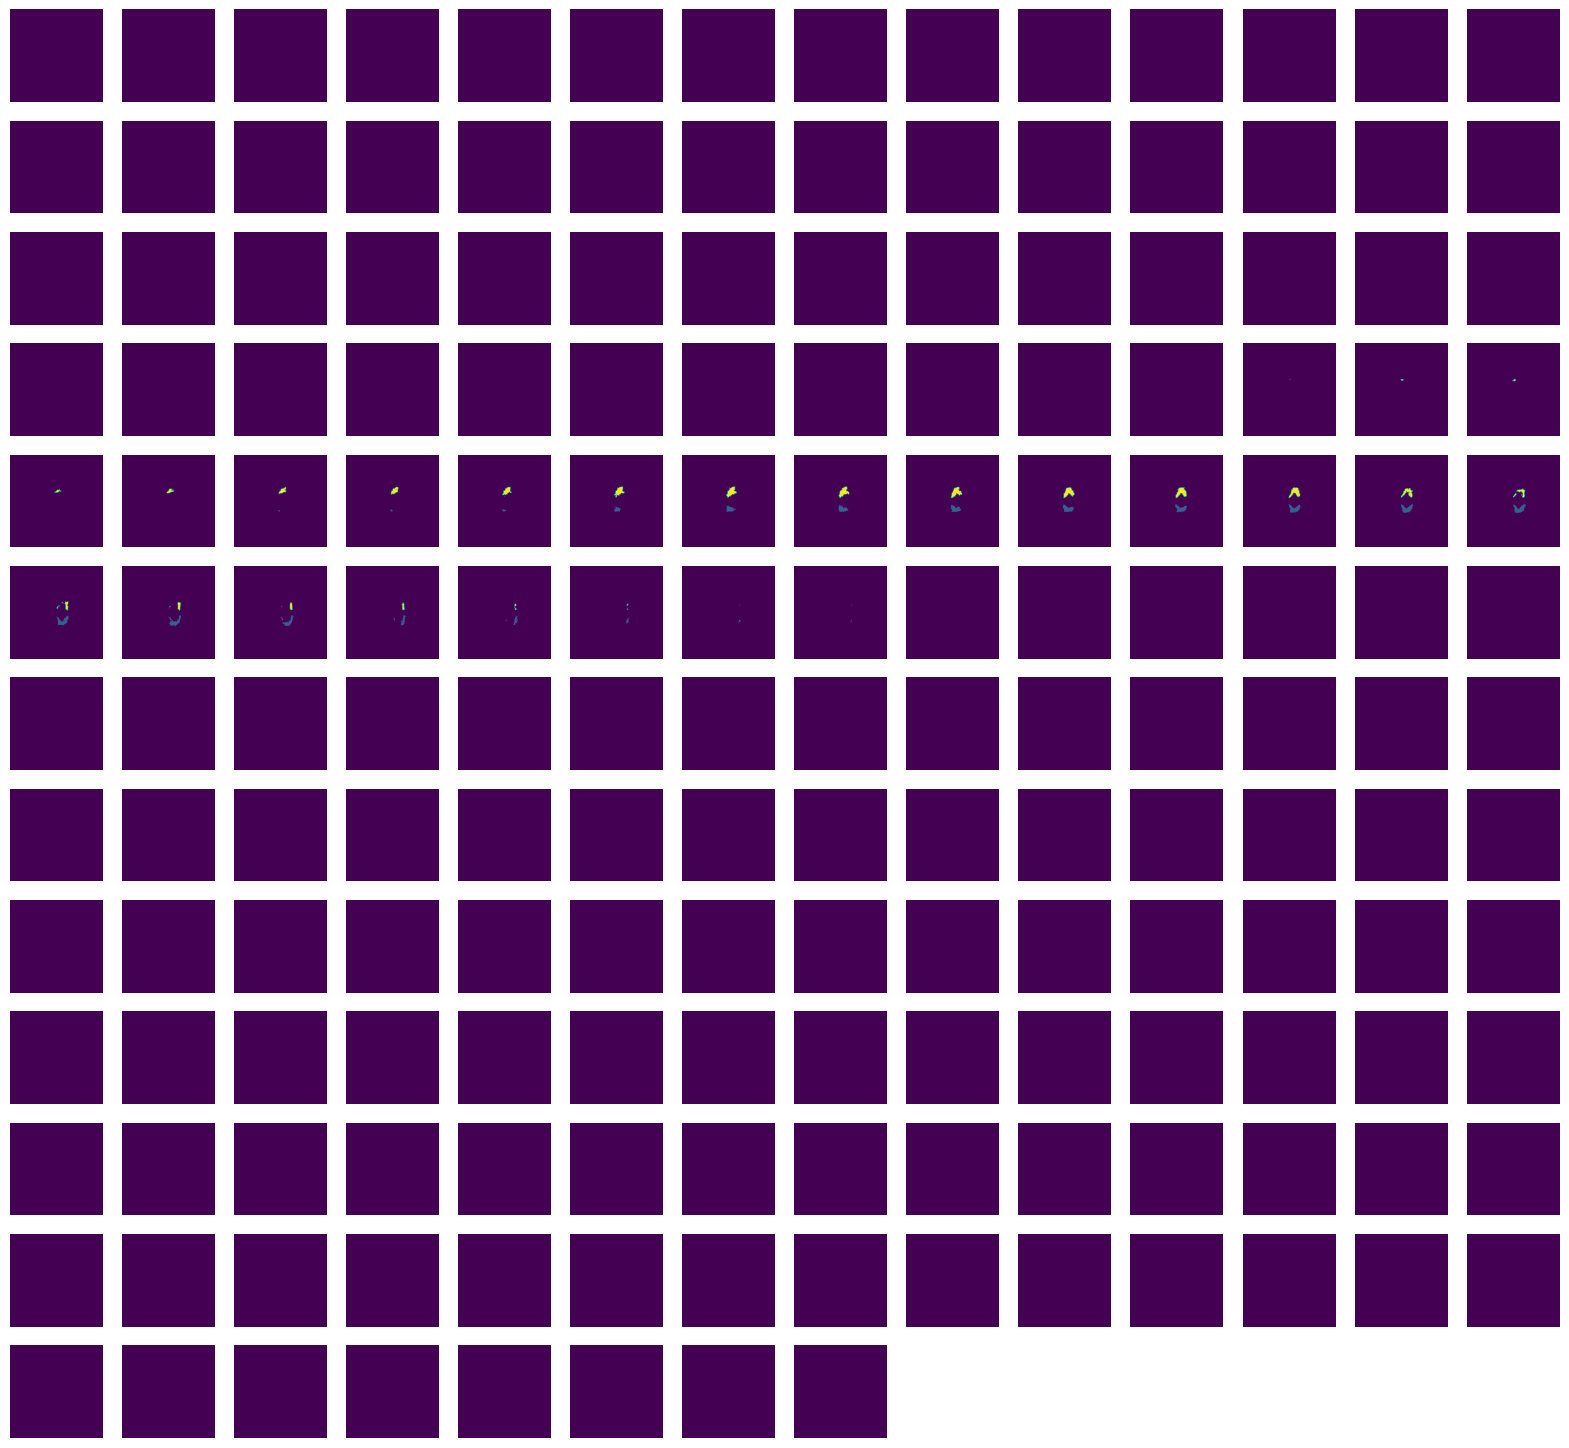

In [10]:
plt.figure(figsize=(20, 20))
for idx, img in enumerate(data.transpose(2, 0, 1)):
    left = np.where(img==17, img, 0)
    right = np.where(img==53, img, 0)
    img = left + right
    plt.subplot(14, 14, idx+1)
    plt.axis('off')
    plt.imshow(img)

In [27]:
mr_path = "Hippo_dataset_VGHTC_share/HIP_002/4 3D MPRAGE 1.0MM TR2800_1.nrrd"
data, header = nrrd.read(mr_path)
data.shape

(256, 256, 176)

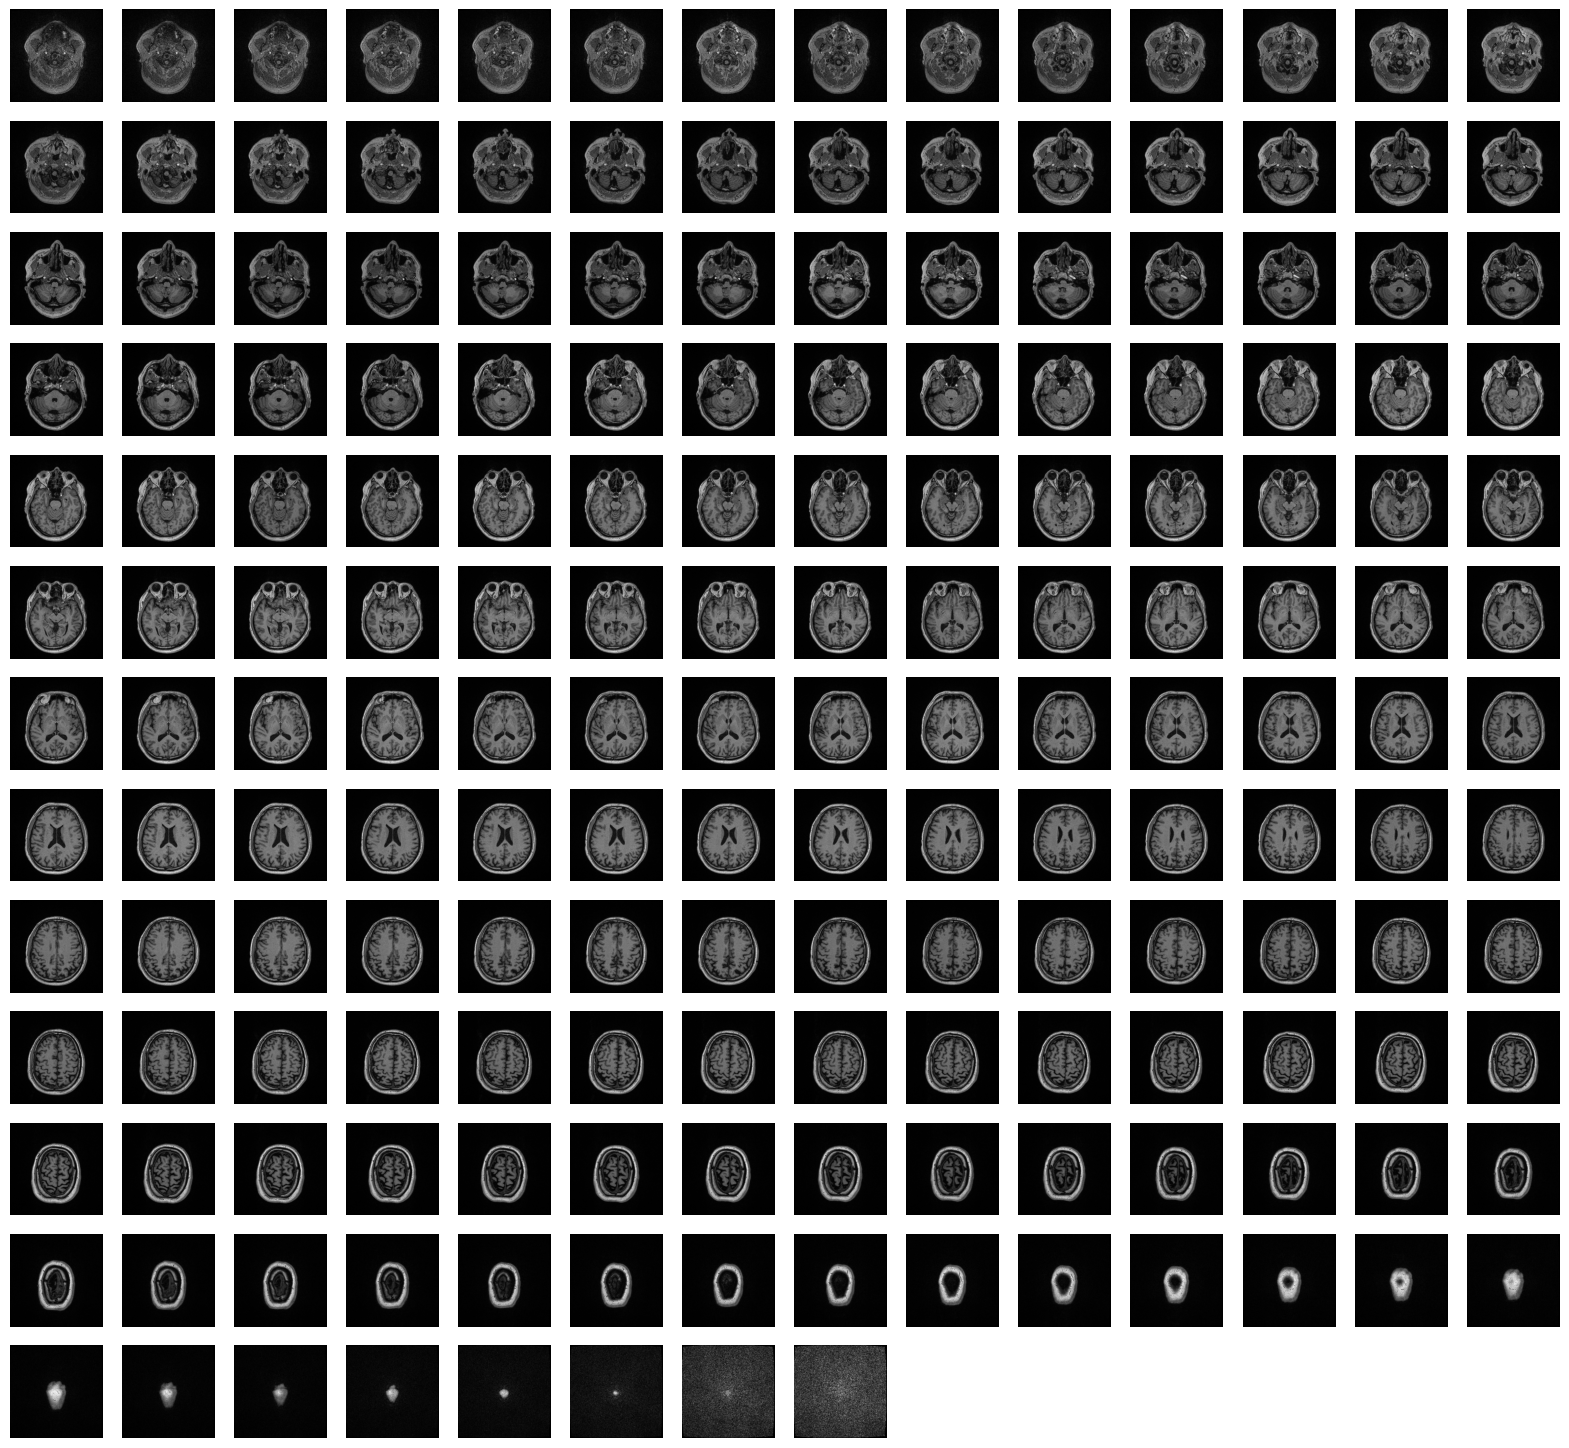

In [29]:
plt.figure(figsize=(20, 20))
for idx, img in enumerate(data.transpose(2, 0, 1)):
    # img = np.rot90(img, k=-1, axes=(0, 1))
    plt.subplot(14, 14, idx+1)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [30]:
pred_path = "Output/HIP_002/prediction.nrrd"
data, header = nrrd.read(pred_path)
data.shape

(256, 256, 176)

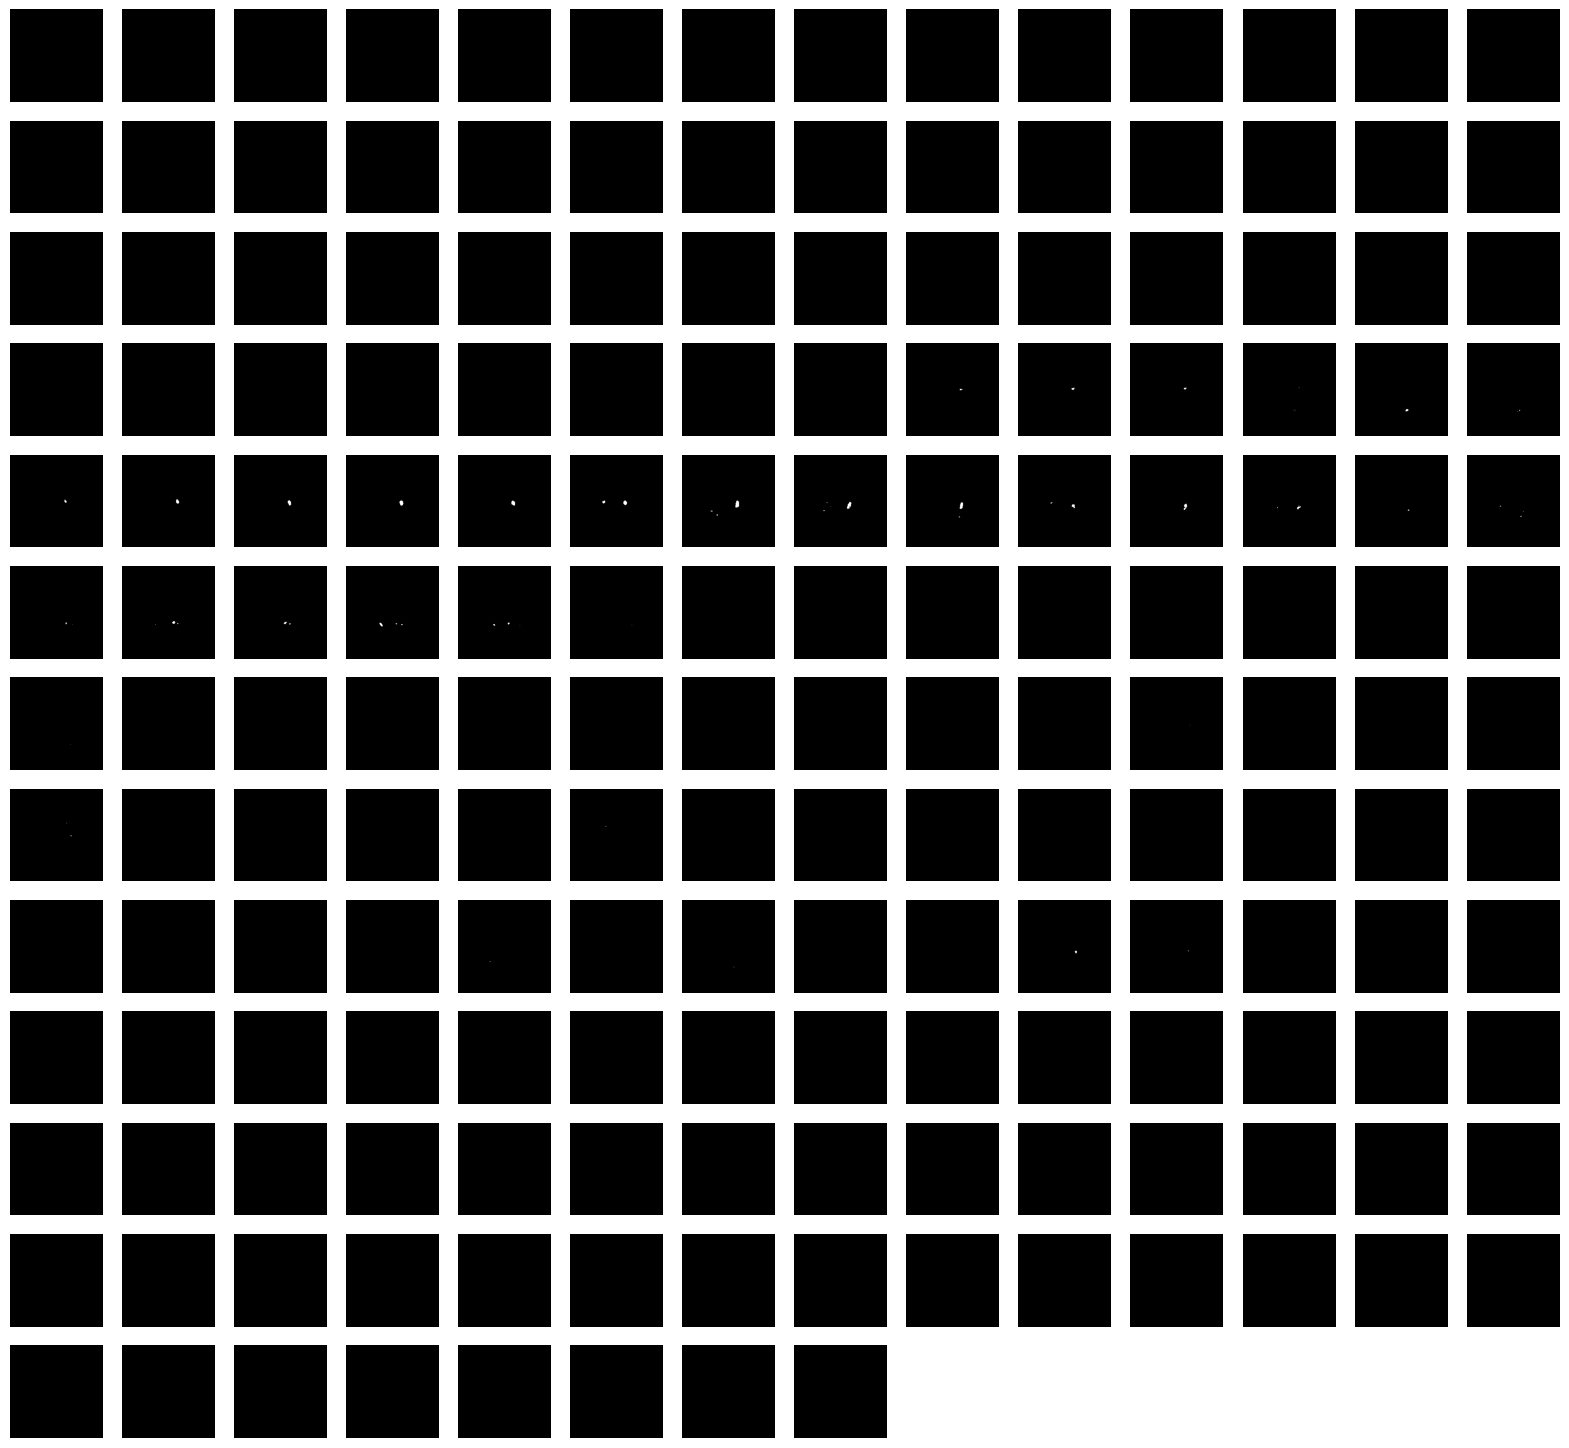

In [31]:
plt.figure(figsize=(20, 20))
for idx, img in enumerate(data.transpose(2, 0, 1)):
    plt.subplot(14, 14, idx+1)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [24]:
mr_path = "Output/01/image.nrrd"
data, header = nrrd.read(mr_path)
data.shape

(256, 256, 276)

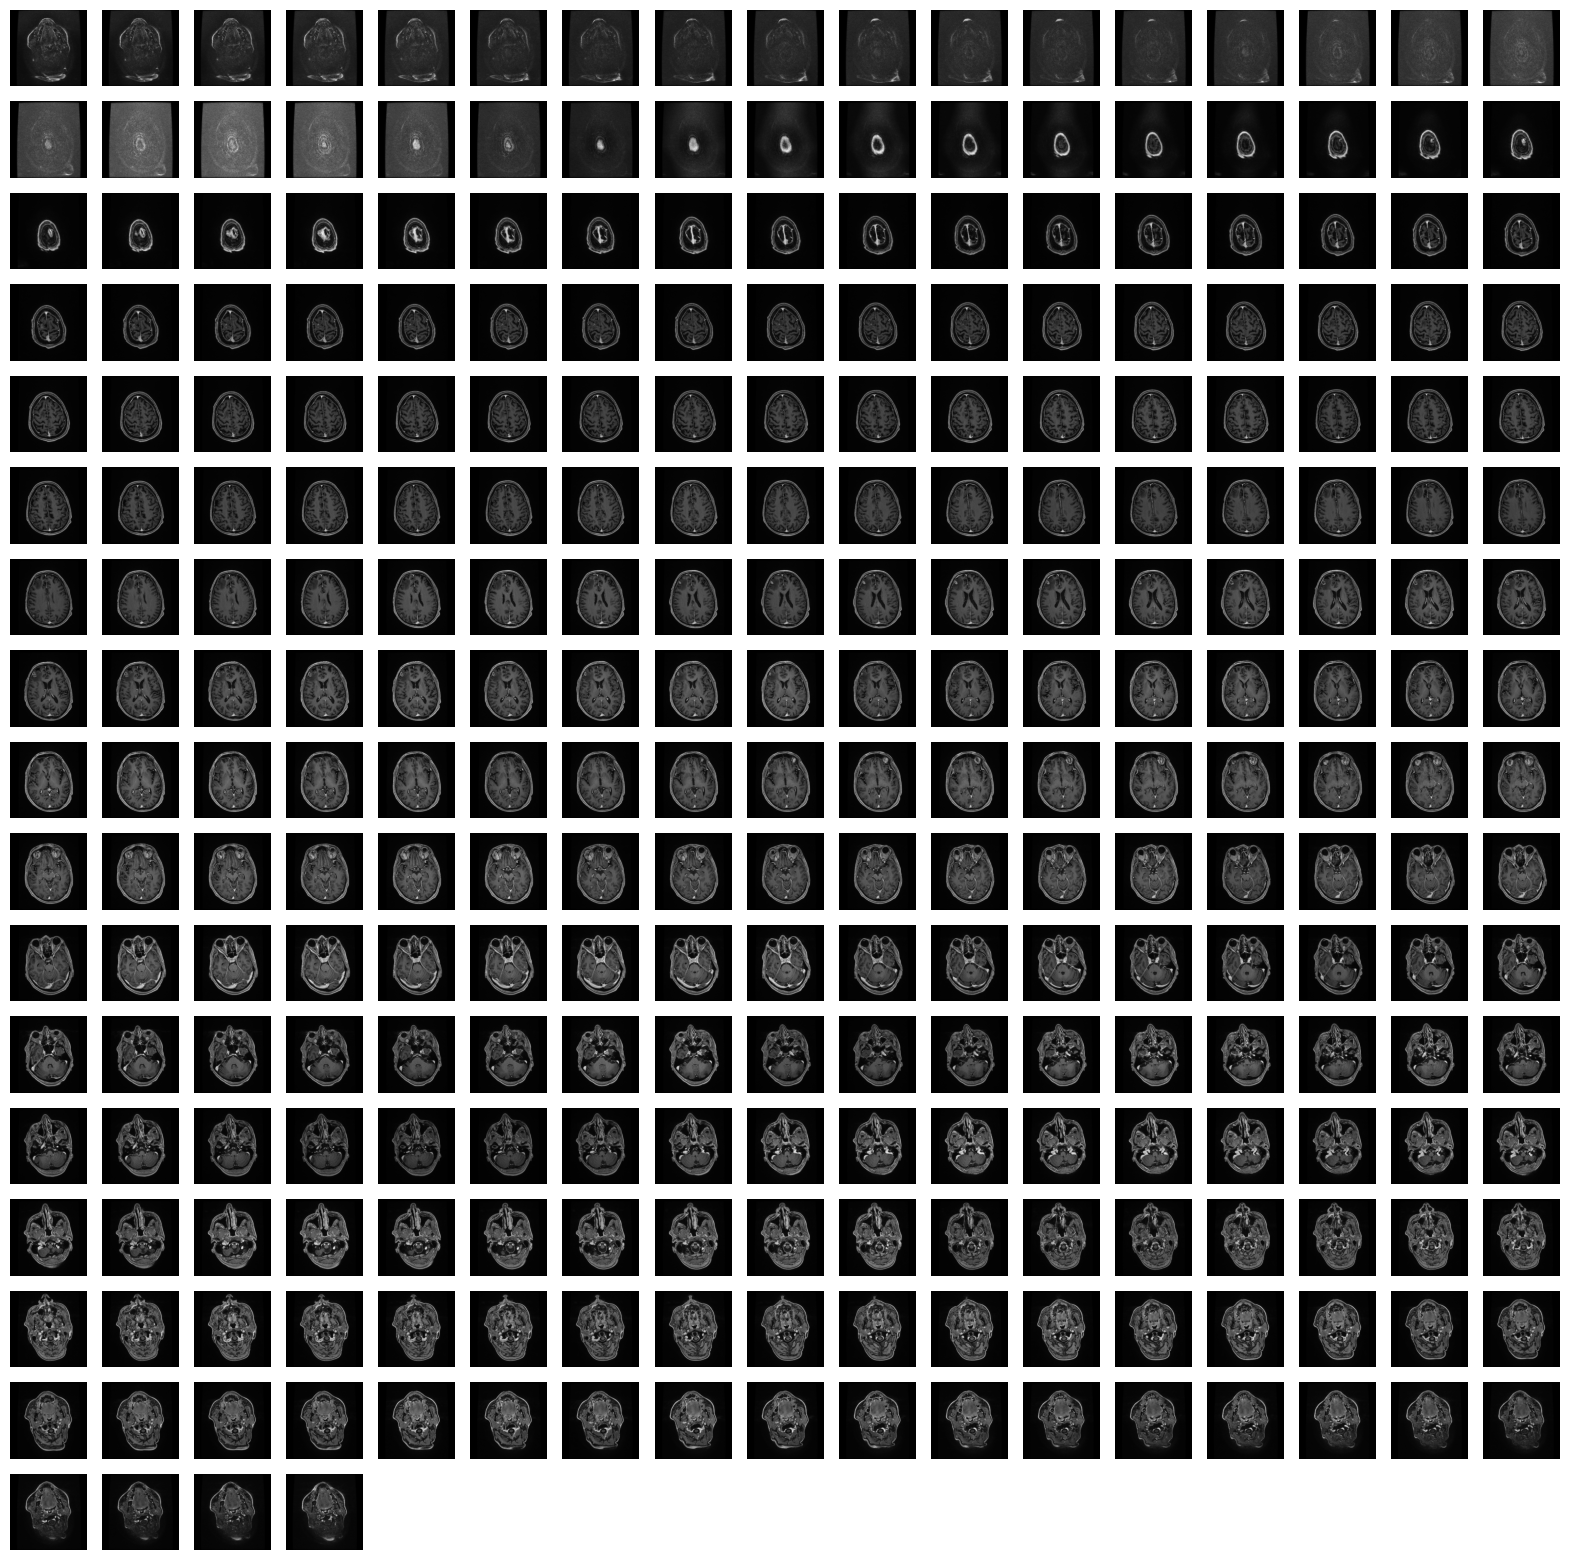

In [25]:
plt.figure(figsize=(20, 20))
for idx, img in enumerate(data.transpose(2, 0, 1)):
    plt.subplot(17, 17, idx+1)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [64]:
import glob, os
strange = ['HIP_006', 'HIP_013', 'HIP_014', 'HIP_043', 'HIP_047', 'HIP_060']
strange_paths = [os.path.join("Hippo_dataset_VGHTC_share", s) for s in strange]
patient_paths = glob.glob(os.path.join("Hippo_dataset_VGHTC_share", "HIP*"))
for sp in strange_paths:
    patient_paths.remove(sp)
print(patient_paths)
length = len(patient_paths)
train_lst = patient_paths[:int(length*0.8)]
test_lst = patient_paths[int(length*0.8):]
with open('trainList.txt', 'w') as f:
    for line in train_lst:
        name = line.split('/')[-1]
        f.writelines("{}\n".format(name))
with open('testList.txt', 'w') as f:
    for line in test_lst:
        name = line.split('/')[-1]
        f.writelines("{}\n".format(name))

['Hippo_dataset_VGHTC_share/HIP_024', 'Hippo_dataset_VGHTC_share/HIP_002', 'Hippo_dataset_VGHTC_share/HIP_044', 'Hippo_dataset_VGHTC_share/HIP_034', 'Hippo_dataset_VGHTC_share/HIP_053', 'Hippo_dataset_VGHTC_share/HIP_046', 'Hippo_dataset_VGHTC_share/HIP_048', 'Hippo_dataset_VGHTC_share/HIP_029_2022', 'Hippo_dataset_VGHTC_share/HIP_027', 'Hippo_dataset_VGHTC_share/HIP_062', 'Hippo_dataset_VGHTC_share/HIP_065', 'Hippo_dataset_VGHTC_share/HIP_021', 'Hippo_dataset_VGHTC_share/HIP_016', 'Hippo_dataset_VGHTC_share/HIP_066', 'Hippo_dataset_VGHTC_share/HIP_010', 'Hippo_dataset_VGHTC_share/HIP_031', 'Hippo_dataset_VGHTC_share/HIP_058', 'Hippo_dataset_VGHTC_share/HIP_039', 'Hippo_dataset_VGHTC_share/HIP_054', 'Hippo_dataset_VGHTC_share/HIP_011', 'Hippo_dataset_VGHTC_share/HIP_026_2019', 'Hippo_dataset_VGHTC_share/HIP_064', 'Hippo_dataset_VGHTC_share/HIP_026_2020', 'Hippo_dataset_VGHTC_share/HIP_050', 'Hippo_dataset_VGHTC_share/HIP_025', 'Hippo_dataset_VGHTC_share/HIP_015', 'Hippo_dataset_VGHTC_s

In [72]:
from matplotlib import pyplot as plt
import numpy as np
img = np.load("Hippo_dataset_VGHTC_share/HIP_064/Seg_npy/107.npy")
# plt.hist(img)
np.where(img==80)

(array([114]), array([119]))

(array([[320.,   0.,   0., ...,   0.,   0.,   0.],
        [320.,   0.,   0., ...,   0.,   0.,   0.],
        [205.,  72.,  31., ...,   0.,   0.,   0.],
        ...,
        [163., 144.,  13., ...,   0.,   0.,   0.],
        [211.,  97.,  11., ...,   0.,   0.,   0.],
        [320.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([ 0.        ,  4.52513578,  9.05027155, 13.57540733, 18.1005431 ,
        22.62567888, 27.15081465, 31.67595043, 36.2010862 , 40.72622198,
        45.25135775]),
 <a list of 320 BarContainer objects>)

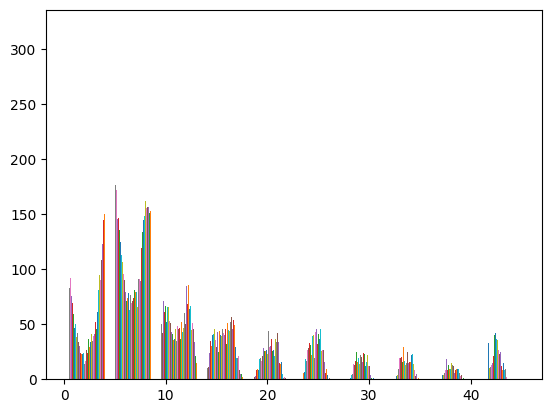

In [6]:
def IntensityClipping(x):
    std = x.std()
    mean = x.mean()
    MAX = mean + 3 * std
    MIN = mean - 3 * std
    x = np.clip(x, MIN, MAX)
    return x
img = IntensityClipping(img)
plt.hist(img)

## HIP_006, HIP_013, HIP_014, HIP_043, HIP_047, HIP_060

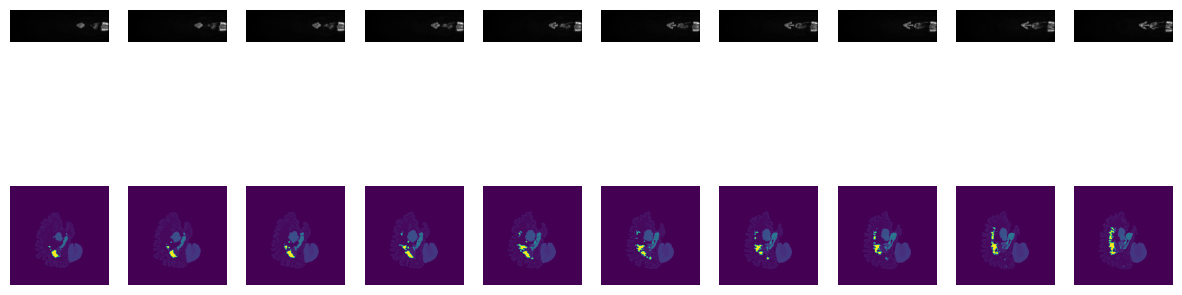

In [60]:
import os
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 5))
patient_number = "HIP_006"
seg_npy_path = "Hippo_dataset_VGHTC_share/{}/mapped_Seg_npy".format(patient_number)
mr_npy_path = "Hippo_dataset_VGHTC_share/{}/MR_npy".format(patient_number)
for i in range(10):
    seg_path = os.path.join(seg_npy_path, '{:03d}.npy'.format(i+50))
    mr_path = os.path.join(mr_npy_path, '{:03d}.npy'.format(i+50))
    
    seg = np.load(seg_path)
    mr = np.load(mr_path)
    
    plt.subplot(2, 10, i+1)
    plt.axis('off')
    plt.imshow(mr, cmap='gray')
    
    plt.subplot(2, 10, i+11)
    plt.axis('off')
    plt.imshow(seg)

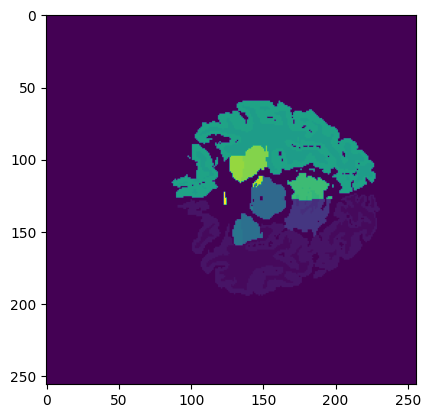

In [16]:
plt.imshow(seg)

In [19]:
import torch.nn.functional as TF
import torch
t_seg = torch.from_numpy(seg).type(torch.long)
print(t_seg.shape)
onehot = TF.one_hot(t_seg, num_classes=43)
onehot.shape

torch.Size([256, 256])


torch.Size([256, 256, 43])

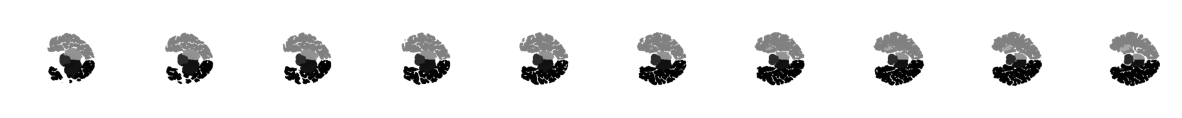

In [3]:
import os
import nrrd
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 5))
patient_number = "HIP_002"
seg_path = os.path.join("Output/{}".format(patient_number), "prediction.nrrd")
seg, header = nrrd.read(seg_path)
    
for idx in range(10):
    s = seg[:, :, idx+50]

    plt.subplot(2, 10, idx+1)
    plt.axis('off')
    plt.imshow(s, cmap='gray')

In [7]:
import os, glob
folder='Hippo_dataset_VGHTC_share'
patient_name='HIP_002'
patient_path = os.path.join(folder, patient_name)
mrs = glob.glob(os.path.join(patient_path, 'MR_npy', '*.npy'))
mrs.sort()

In [12]:
import nrrd
MR = []
for p in mrs:
    mr = np.load(p)
    MR.append(mr)
MR = np.array(MR).transpose(1, 2, 0)
folder = "Output/{}".format(patient_name)
nrrd.write(os.path.join(folder, 'MR.nrrd'), MR)
MR.shape

(256, 256, 176)